# Day 08. Exercise 05
# Clustering

## 0. Imports

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [234]:
# 1. Читаем csv файл в датафрейм
df = pd.read_csv('../data/regression.csv')

In [235]:
# 2. Удаляем колонку 'pageviews'
df = df.drop(columns=['pageviews'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   AVG(diff)    29 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 828.0+ bytes


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [236]:
X = df[['num_commits', 'AVG(diff)']]

## Создаем модель KMeans с 3 кластерами и random_state=21

In [237]:
kmeans = KMeans(n_clusters=3, random_state=21)
clusters = kmeans.fit_predict(X)

## Добавим метки кластеров к исходному DataFrame

In [238]:
df['cluster'] = clusters

## Визуализируем данные с раскраской по кластерам

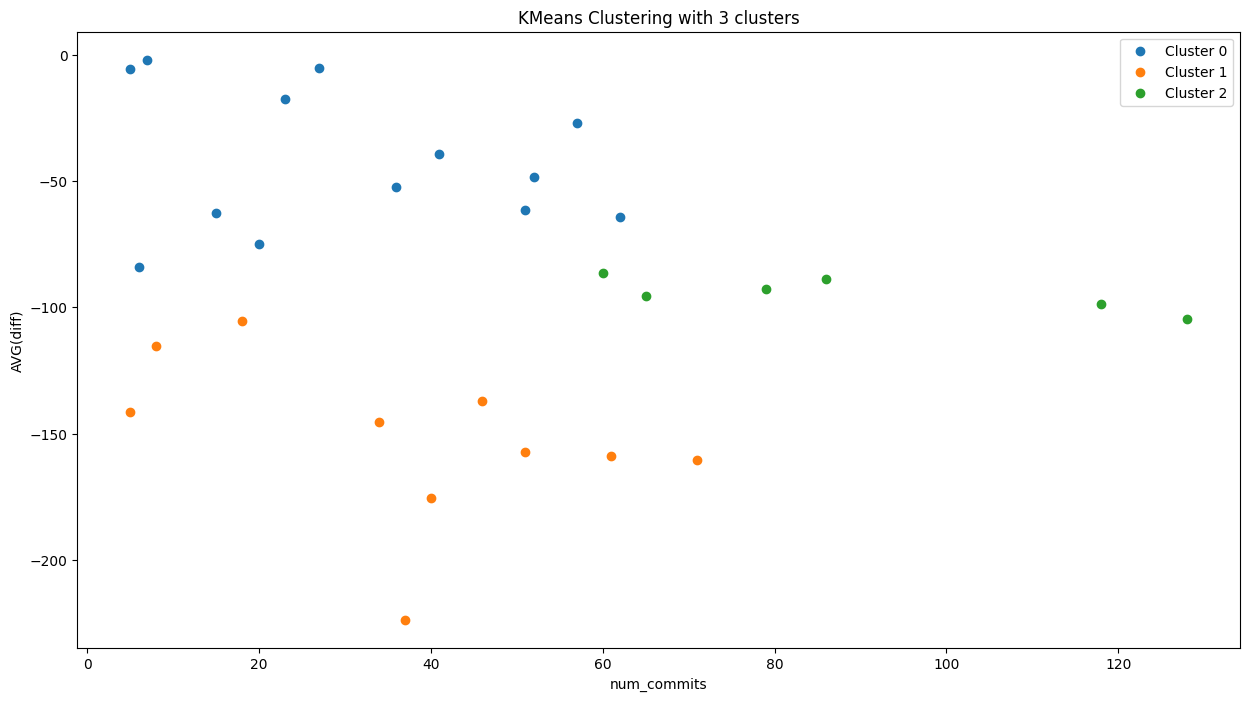

In [239]:
plt.figure(figsize=(15,8))
for cluster_label in range(3):
    plt.scatter(
        df[df['cluster'] == cluster_label]['num_commits'], 
        df[df['cluster'] == cluster_label]['AVG(diff)'], 
        label=f'Cluster {cluster_label}'
    )
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('KMeans Clustering with 3 clusters')
plt.legend()
plt.show()

## Попробуем разные числа кластеров и посмотрим как изменяется график

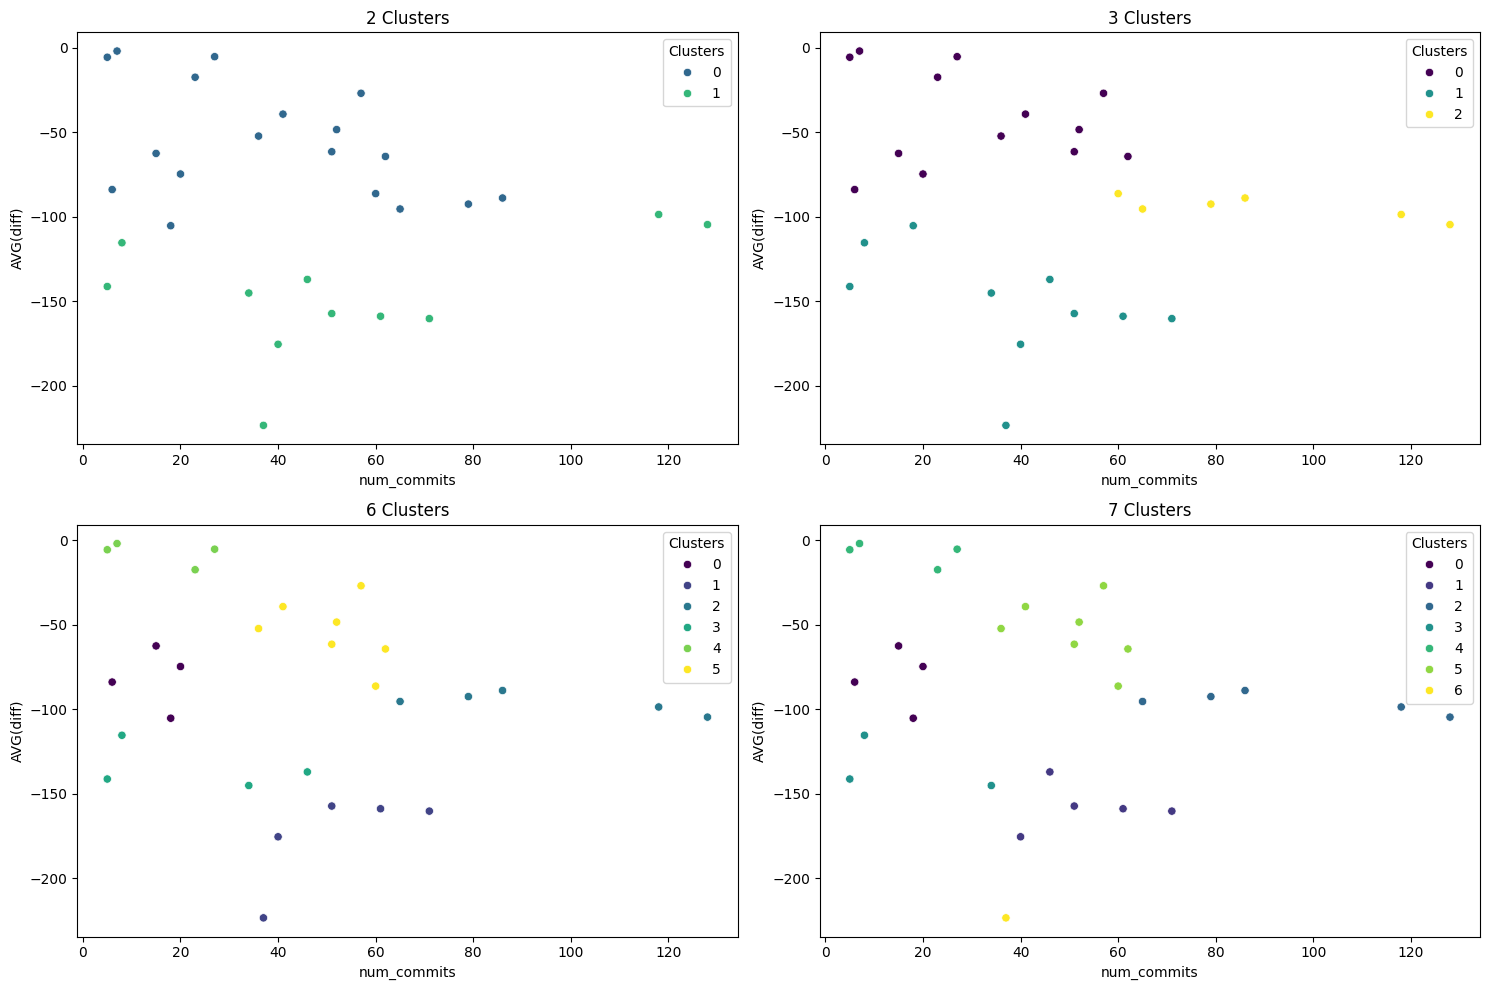

In [240]:
n_clusters_list = [2, 3, 6, 7]

def plot_kmeans_clusters(n_clusters, ax):
    km = KMeans(n_clusters=n_clusters, random_state=21)
    y_pred = km.fit_predict(df[['num_commits', 'AVG(diff)']])
    df['Clusters'] = y_pred
    sns.scatterplot(data=df, x='num_commits', y='AVG(diff)', hue='Clusters', ax=ax, palette='viridis')
    ax.set_title(f'{n_clusters} Clusters')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, n_clusters in enumerate(n_clusters_list):
    plot_kmeans_clusters(n_clusters, axes[i])

plt.tight_layout()
plt.show()

## Рассчитаем silhouette_score

In [241]:
df = df[['num_commits', 'AVG(diff)']]
for i in range(2,9):
    labels=KMeans(n_clusters=i,random_state=21).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df,labels,random_state=21)))

Silhouette score for k(clusters) = 2 is 0.4194920562377423
Silhouette score for k(clusters) = 3 is 0.4454402135233297
Silhouette score for k(clusters) = 4 is 0.41503879936268956
Silhouette score for k(clusters) = 5 is 0.3521030626149593
Silhouette score for k(clusters) = 6 is 0.3954350435152892
Silhouette score for k(clusters) = 7 is 0.39637476619843964
Silhouette score for k(clusters) = 8 is 0.48638087320227846


Оптимальное число кластеров: k=8

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

## Создадим модель DBSCAN с eps=20, min_samples=2

In [242]:
dbscan = DBSCAN(eps=22, min_samples=2).fit(X)  

## Обучим модель

In [243]:
clusters = dbscan.fit_predict(X)

## Визуализация кластеров

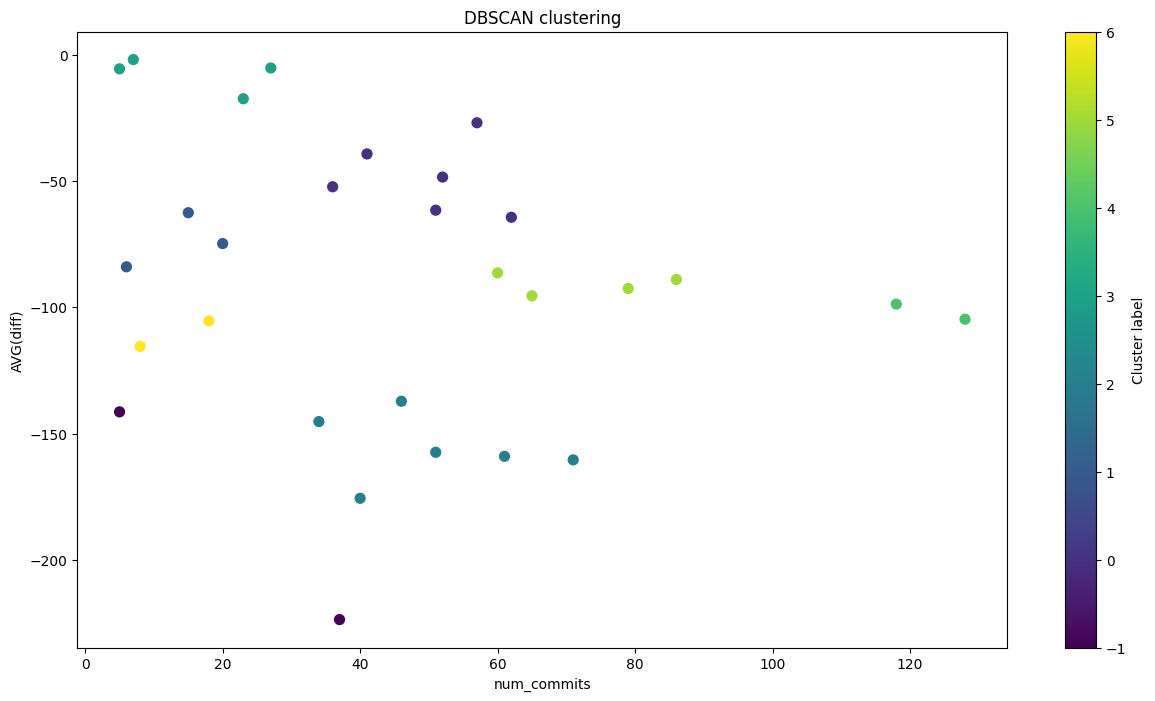

In [244]:
plt.figure(figsize=(15, 8))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=clusters, cmap='viridis', s=50)
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title('DBSCAN clustering')
plt.colorbar(label='Cluster label')
plt.show()

## Рассчитаем silhouette_score

In [245]:
X = df[['num_commits', 'AVG(diff)']]

for eps in np.arange(20, 23):  
    for min_samples in range(1, 5):
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        labels = clustering.fit_predict(X)
        
        try:
            score = metrics.silhouette_score(X, labels)
            print(f"eps={eps:.1f}, min_samples={min_samples} -> Silhouette Score: {score}")
        except Exception as e:
            print(f"eps={eps:.1f}, min_samples={min_samples} -> Ошибка при расчёте silhouette_score: {e}")

eps=20.0, min_samples=1 -> Silhouette Score: 0.4322483665424573
eps=20.0, min_samples=2 -> Silhouette Score: 0.38339641455696616
eps=20.0, min_samples=3 -> Silhouette Score: 0.046677004430482796
eps=20.0, min_samples=4 -> Silhouette Score: -0.027327812753917446
eps=21.0, min_samples=1 -> Silhouette Score: 0.43613134600138975
eps=21.0, min_samples=2 -> Silhouette Score: 0.4646046547648843
eps=21.0, min_samples=3 -> Silhouette Score: 0.3244154376216247
eps=21.0, min_samples=4 -> Silhouette Score: 0.09625090910636881
eps=22.0, min_samples=1 -> Silhouette Score: 0.48713041554757475
eps=22.0, min_samples=2 -> Silhouette Score: 0.4794129092034348
eps=22.0, min_samples=3 -> Silhouette Score: 0.35962377151588787
eps=22.0, min_samples=4 -> Silhouette Score: 0.14561751812653242


Оптимальное число: eps=22, min_samples=1

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [246]:
df = df[['num_commits', 'AVG(diff)']]

X = df.values

## Создаем кластеризацию с 5 кластерами

In [247]:
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=n_clusters)
labels = agg.fit_predict(X)

## Визуализация scatter plot с раскраской по кластерам

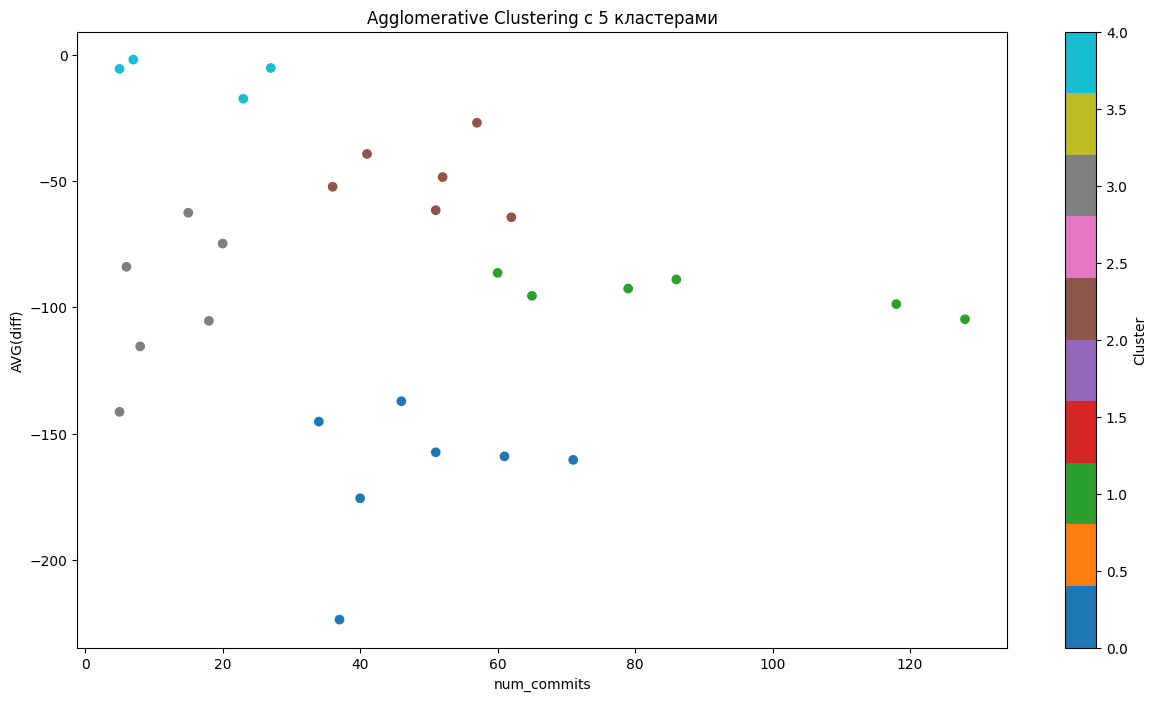

In [248]:
plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
plt.xlabel('num_commits')
plt.ylabel('AVG(diff)')
plt.title(f'Agglomerative Clustering с {n_clusters} кластерами')
plt.colorbar(label='Cluster')
plt.show()

## Попробуем другие значения n_clusters — например, 2, 3, 4 и т.д. и повторим визуализацию для других n_clusters.

Silhouette Score при n_clusters=2: 0.3590
Silhouette Score при n_clusters=3: 0.3390
Silhouette Score при n_clusters=4: 0.4448
Silhouette Score при n_clusters=5: 0.4638
Silhouette Score при n_clusters=6: 0.4527
Silhouette Score при n_clusters=7: 0.4866
Silhouette Score при n_clusters=8: 0.5078
Silhouette Score при n_clusters=9: 0.4758
Silhouette Score при n_clusters=10: 0.4312
Silhouette Score при n_clusters=11: 0.4310


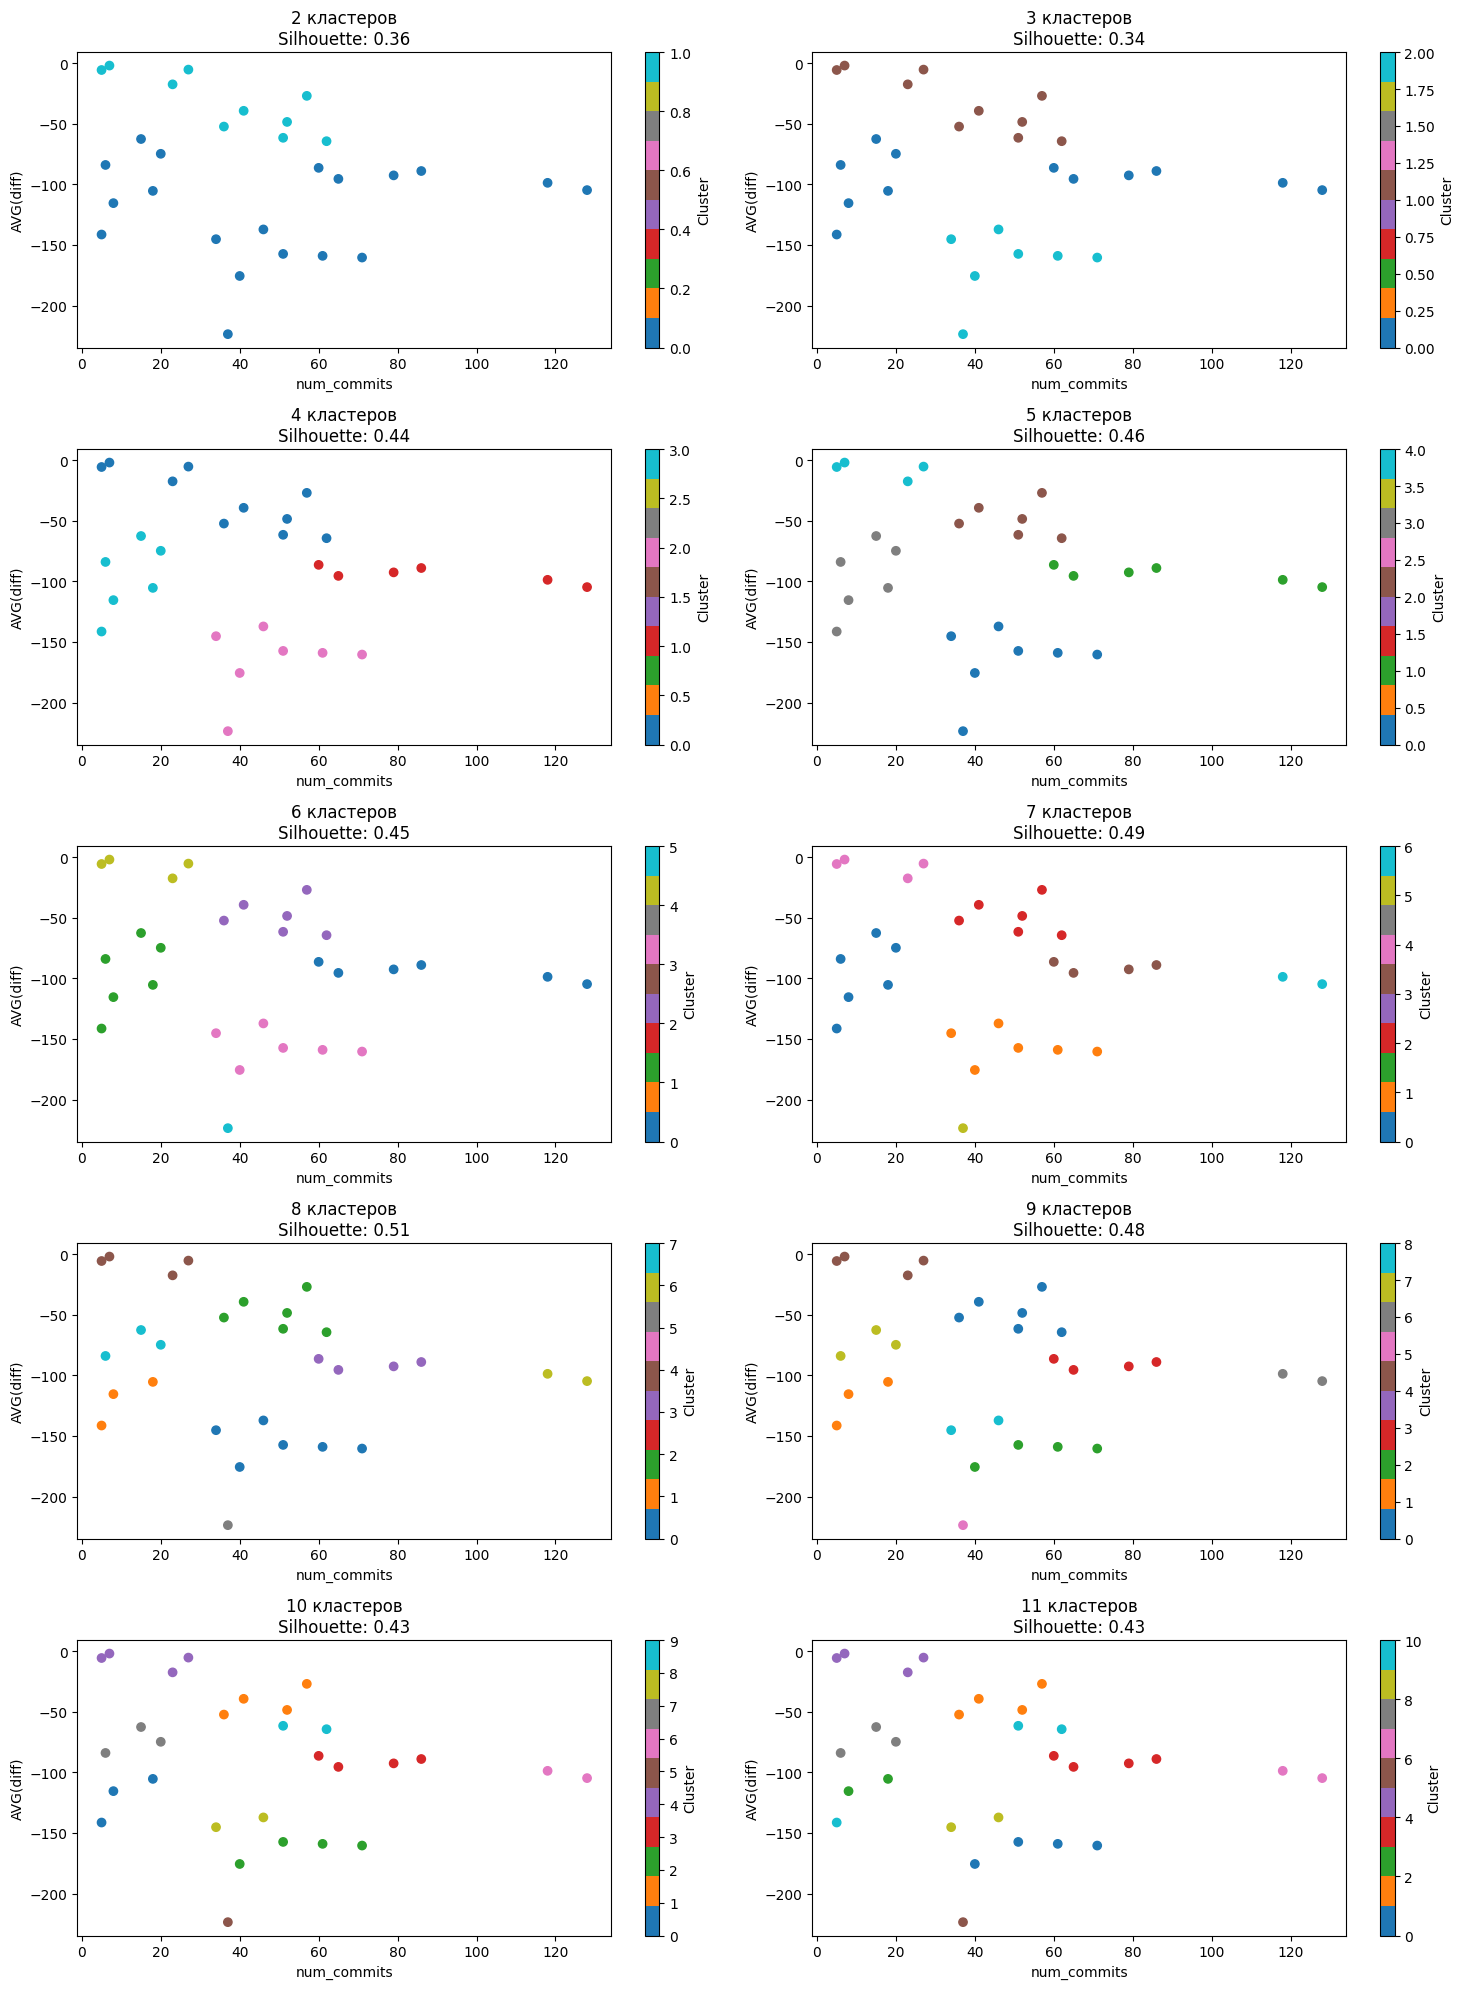

In [249]:
scores = []
n_plots = 9  # для n_clusters от 2 до 10

plt.figure(figsize=(15, 4 * (n_plots // 2 + n_plots % 2)))  # высота подбирается

for i, n_clusters in enumerate(range(2, 12), 1):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f'Silhouette Score при n_clusters={n_clusters}: {score:.4f}')
    
    plt.subplot((n_plots + 1) // 2, 2, i)  # по 2 графика в ряд
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.title(f'{n_clusters} кластеров\nSilhouette: {score:.2f}')
    plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

## Рассчёт silhouette score

In [250]:
scores = []
for n_clusters in range(2, 12):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f'Silhouette Score при n_clusters={n_clusters}: {score:.4f}')

Silhouette Score при n_clusters=2: 0.3590
Silhouette Score при n_clusters=3: 0.3390
Silhouette Score при n_clusters=4: 0.4448
Silhouette Score при n_clusters=5: 0.4638
Silhouette Score при n_clusters=6: 0.4527
Silhouette Score при n_clusters=7: 0.4866
Silhouette Score при n_clusters=8: 0.5078
Silhouette Score при n_clusters=9: 0.4758
Silhouette Score при n_clusters=10: 0.4312
Silhouette Score при n_clusters=11: 0.4310


Оптимально число n_clusters: 8

## Визуализация дендрограммы

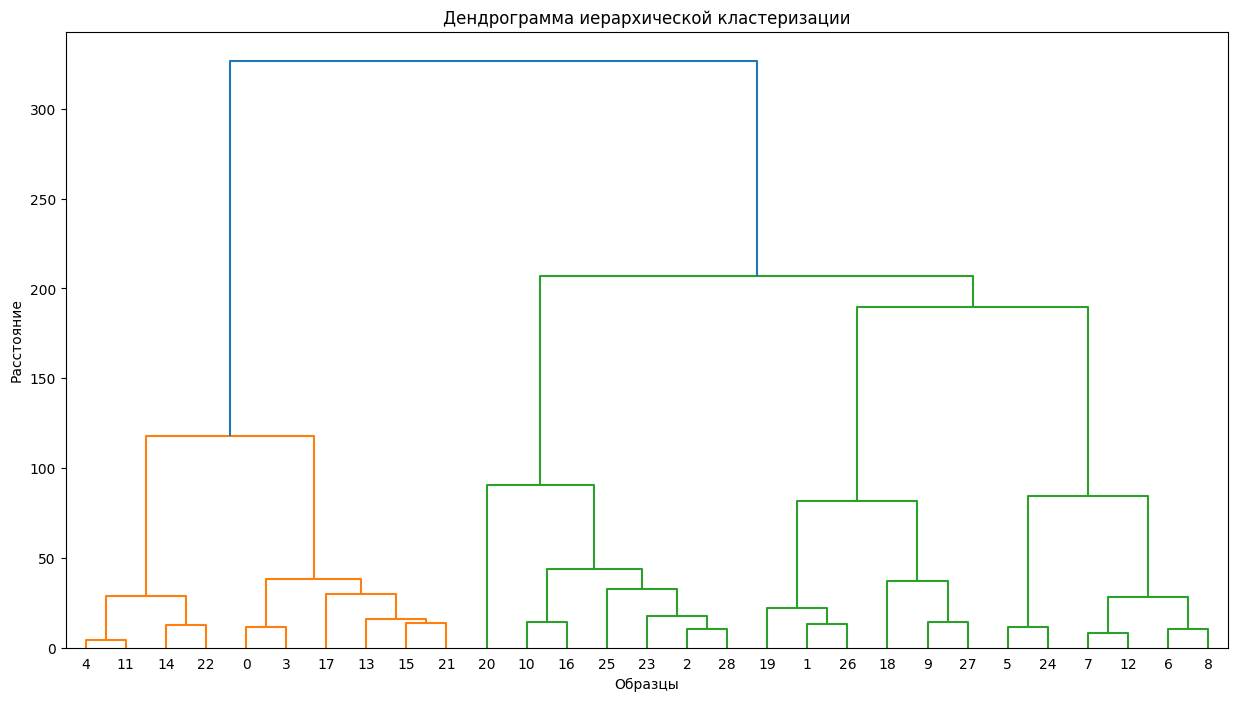

In [251]:
linked = linkage(X, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, p=30, leaf_rotation=0, 
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Образцы')
plt.ylabel('Расстояние')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

## Функция принимающая на вход класс модели кластеризации и другие параментры для настройки модели

In [252]:
def optimize_clustering_param(model_class, fixed_params, param_name, param_range, X):
    scores = []
    
    for val in param_range:
        # Копируем параметры и добавляем параметр для оптимизации
        params = fixed_params.copy()
        params[param_name] = val
        
        # Создаем модель с параметрами
        model = model_class(**params)
        
        # Получаем метки кластеров
        labels = model.fit_predict(X)
        
        # Проверяем валидность для silhouette_score
        unique_labels = set(labels)
        if len(unique_labels) > 1 and -1 not in unique_labels:
            score = silhouette_score(X, labels)
        else:
            score = -1
        
        scores.append(score)
    
    # Лучшая настройка
    best_idx = np.argmax(scores)
    best_val = param_range[best_idx]
    
    # Визуализация
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    axs[0].plot(param_range, scores, marker='o')
    axs[0].set_xlabel(param_name)
    axs[0].set_ylabel('Silhouette Score')
    axs[0].set_title(f'Silhouette Score vs {param_name}')
    
    best_params = fixed_params.copy()
    best_params[param_name] = best_val
    best_model = model_class(**best_params)
    best_labels = best_model.fit_predict(X)
    
    scatter = axs[1].scatter(X[:, 0], X[:, 1], c=best_labels, cmap='tab10')
    axs[1].set_xlabel('Feature 1')
    axs[1].set_ylabel('Feature 2')
    axs[1].set_title(f'Clustering with {param_name}={best_val}')
    
    legend1 = axs[1].legend(*scatter.legend_elements(), title="Clusters")
    axs[1].add_artist(legend1)
    
    plt.tight_layout()
    plt.show()
    
    return best_val, scores

## Пример применения функции на классе модели кластеризации `AgglomerativeClustering`

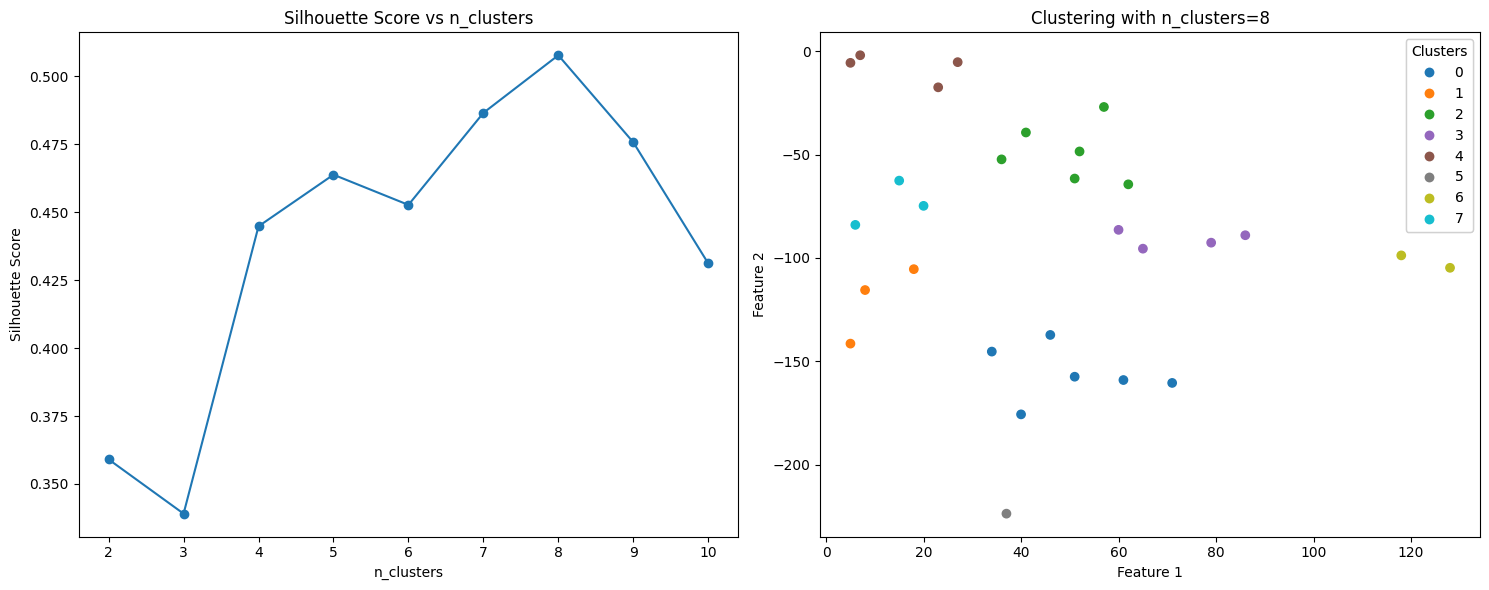

Лучшее количество кластеров: 8


In [253]:
X_np = X

best_n_clusters, scores = optimize_clustering_param(
    model_class=AgglomerativeClustering,
    fixed_params={},
    param_name='n_clusters',
    param_range=range(2, 11),
    X=X_np
)
print(f"Лучшее количество кластеров: {best_n_clusters}")

## Пример применения функции на классе модели кластеризации `KMeans`

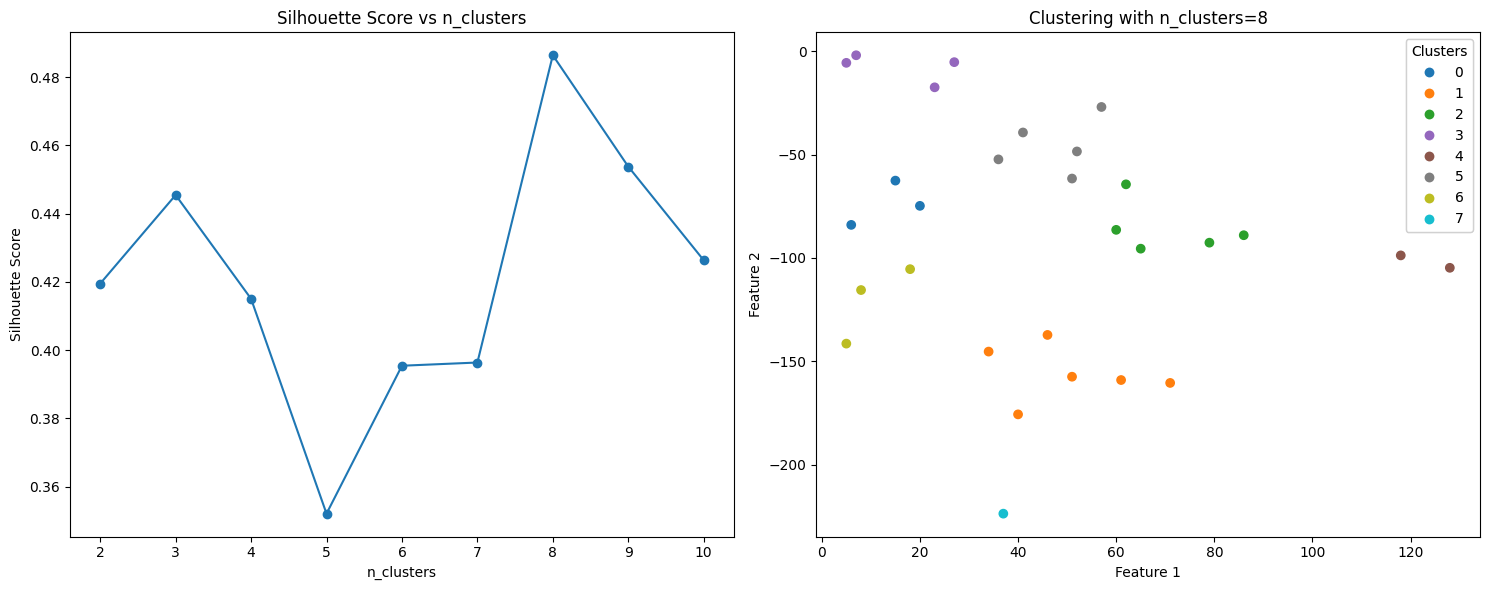

Лучшее количество кластеров: 8


In [254]:
best_n_clusters, scores = optimize_clustering_param(
    model_class=KMeans,
    fixed_params={'random_state': 21},
    param_name='n_clusters',
    param_range=range(2, 11),
    X=X_np
)
print(f"Лучшее количество кластеров: {best_n_clusters}")

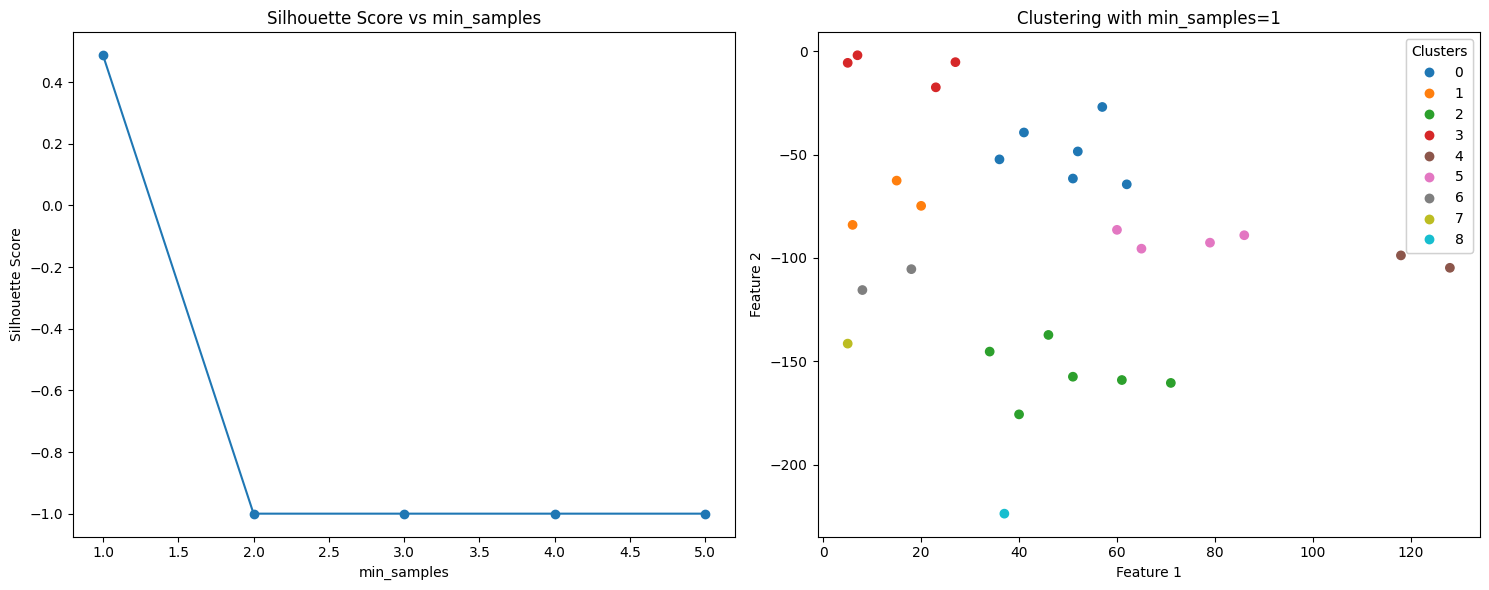

Лучшее значение min_samples: 1


In [263]:
best_min_samples, scores = optimize_clustering_param(
    DBSCAN,
    fixed_params={'eps': 22},  # фиксируем eps
    param_name='min_samples',
    param_range=range(1, 6),
    X=X
)

print(f"Лучшее значение min_samples: {best_min_samples}")

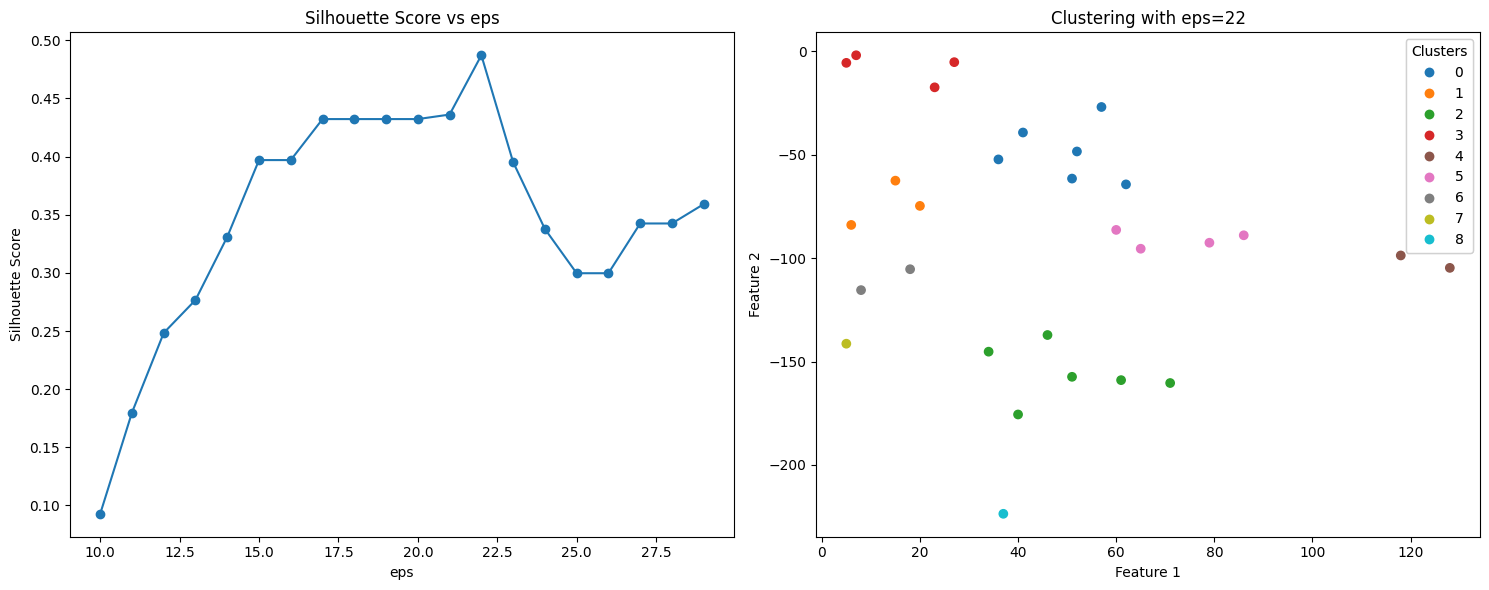

Лучшее значение eps: 22


In [267]:
best_eps, scores = optimize_clustering_param(
    DBSCAN,
    fixed_params={'min_samples': 1},  # фиксируем min_samples, например 1
    param_name='eps',
    param_range=np.arange(10, 30),
    X=X
)

print(f"Лучшее значение eps: {best_eps}")